In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.patches import Circle, Rectangle


In [60]:
# Load data from file
filename = "EFieldFile_lowtol.txt"  # Change to your actual file name
data = np.loadtxt(filename)

# Extract columns
x, y, z, Ex, Ey, Ez = data.T

print(data)

[[-8.90000e-01 -8.90000e-01 -8.90000e-01  7.37500e+05  7.37500e+05
  -4.91648e+05]
 [-8.90000e-01 -8.90000e-01 -8.80000e-01  3.18121e+05  3.18121e+05
  -6.36128e+05]
 [-8.90000e-01 -8.90000e-01 -8.70000e-01  1.55895e+05  1.55895e+05
  -1.95264e+05]
 ...
 [ 8.80000e-01  8.80000e-01  8.60000e-01  7.38918e+02  7.38918e+02
  -9.27139e+02]
 [ 8.80000e-01  8.80000e-01  8.70000e-01  1.50927e+03  1.50927e+03
  -3.01937e+03]
 [ 8.80000e-01  8.80000e-01  8.80000e-01  3.50000e+03  3.50000e+03
  -2.33347e+03]]


In [61]:
# Filter for values where -0.01 < y < 0.01
mask = (y > -0.01) & (y < 0.01)
x, z, Ex, Ez = x[mask], z[mask], Ex[mask], Ez[mask]

In [62]:
# Create a grid for interpolation
X, Z = np.meshgrid(np.linspace(x.min(), x.max(), 150), 
                   np.linspace(z.min(), z.max(), 150))

# Interpolate Ex, Ez onto the grid
Ex_grid = griddata((x, z), Ex, (X, Z), method='cubic')
Ez_grid = griddata((x, z), Ez, (X, Z), method='cubic')

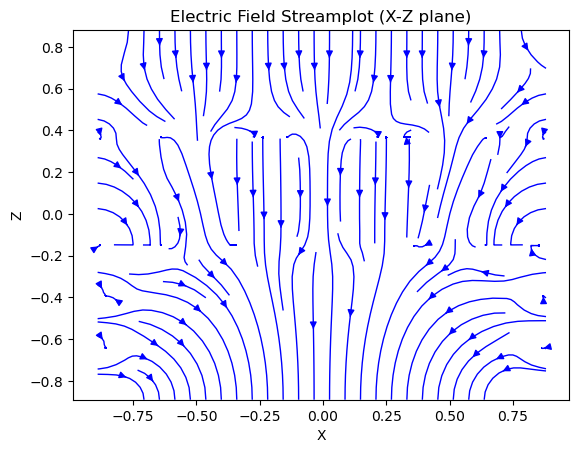

In [63]:
# Streamplot
plt.figure()
plt.streamplot(X, Z, Ex_grid, Ez_grid, color='b', linewidth=1)
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Electric Field Streamplot (X-Z plane)")

plt.show()

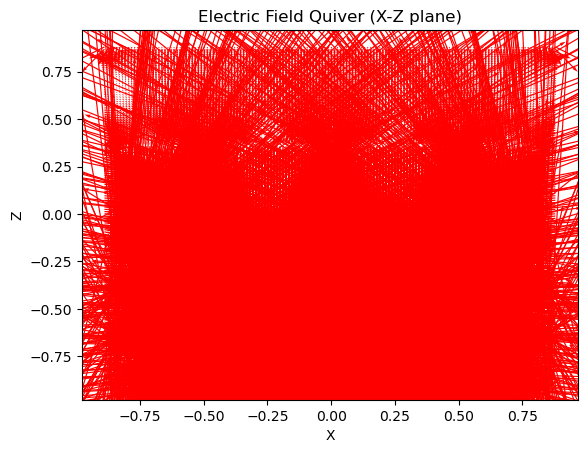

In [64]:
# Quiver plot
plt.figure()
plt.quiver(X, Z, Ex_grid, Ez_grid, scale=50000, color='r')
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Electric Field Quiver (X-Z plane)")

plt.show()

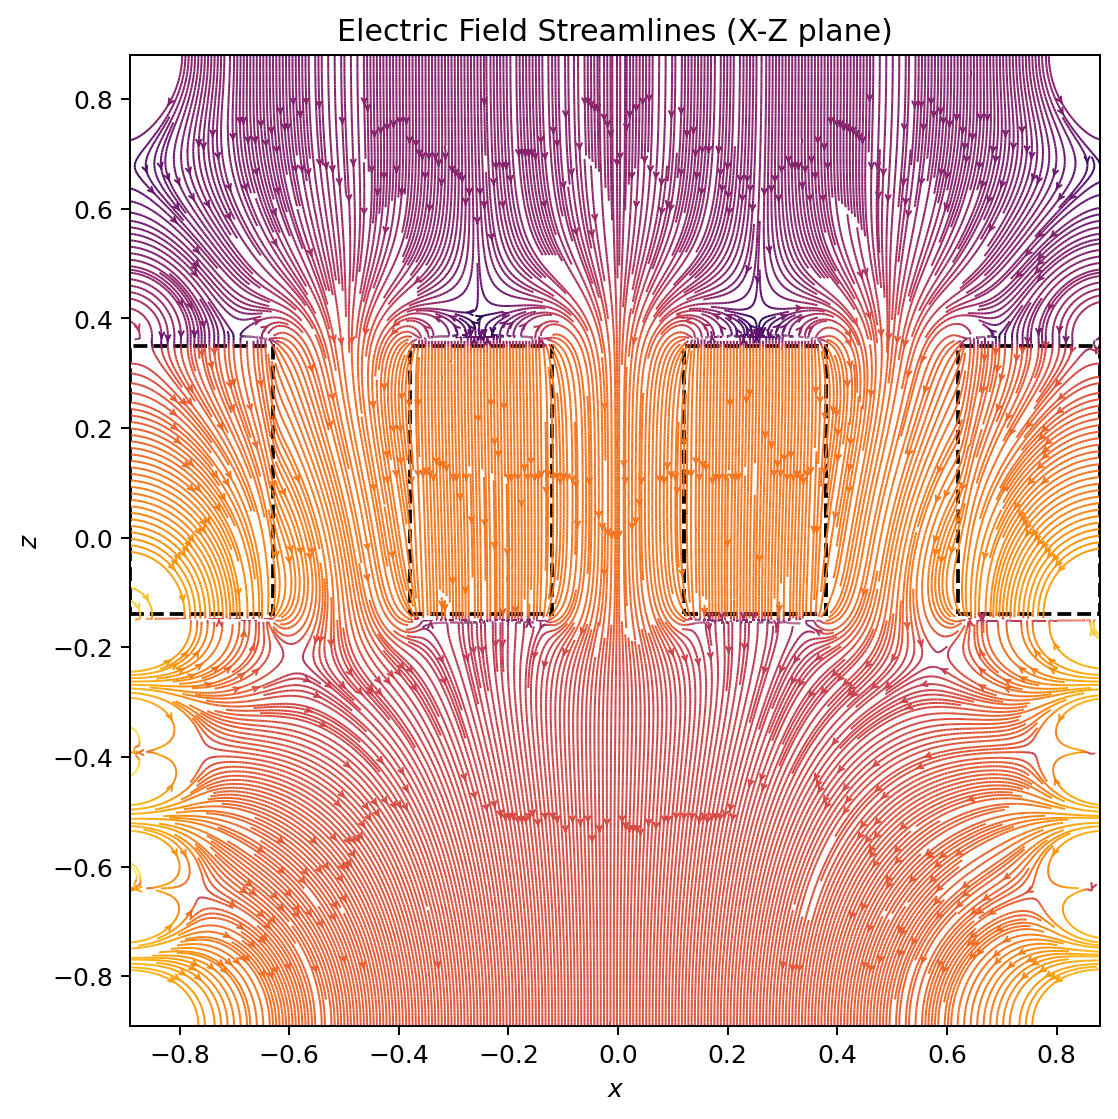

In [87]:
# Define grid resolution
nx, nz = 164, 164
x_grid = np.linspace(x.min(), x.max(), nx)
z_grid = np.linspace(z.min(), z.max(), nz)
X, Z = np.meshgrid(x_grid, z_grid)

# Interpolate Ex, Ez onto the grid
from scipy.interpolate import griddata
Ex_grid = griddata((x, z), Ex, (X, Z), method='cubic')
Ez_grid = griddata((x, z), Ez, (X, Z), method='cubic')

# Create figure
fig, ax = plt.subplots(figsize=(7, 7),dpi = 180)

# Compute field strength for color mapping
color = 2 * np.log(np.hypot(Ex_grid, Ez_grid))

# Streamplot of the electric field
ax.streamplot(X, Z, Ex_grid, Ez_grid, color=color, linewidth=0.8, 
              cmap=plt.cm.inferno, density=10, arrowstyle='->', arrowsize=.5)

# Box 1: -0.13 - 0.25 < x < 0.13 - 0.25
ax.add_patch(Rectangle((-0.13 - 0.25, -0.14), 0.26, 0.49, edgecolor='k', 
                       facecolor='none', linestyle='--', linewidth=1.5))

# Box 2: -0.13 + 0.25 < x < 0.13 + 0.25
ax.add_patch(Rectangle((-0.13 + 0.25, -0.14), 0.26, 0.49, edgecolor='k', 
                       facecolor='none', linestyle='--', linewidth=1.5))

# Box 3: Same as Box 2, shifted by 0.25
ax.add_patch(Rectangle((-0.13 + 0.25, -0.14), 0.26, 0.49, edgecolor='k', 
                       facecolor='none', linestyle='--', linewidth=1.5))

# Box 3: Same as Box 2, shifted by 0.25
ax.add_patch(Rectangle((-0.13 + 0.5+0.25, -0.14), 0.26, 0.49, edgecolor='k', 
                       facecolor='none', linestyle='--', linewidth=1.5))

# Box 3: Same as Box 2, shifted by 0.25
ax.add_patch(Rectangle((-0.13 - 0.5-0.26, -0.14), 0.26, 0.49, edgecolor='k', 
                       facecolor='none', linestyle='--', linewidth=1.5))

# Labels and limits
ax.set_xlabel("$x$")
ax.set_ylabel("$z$")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(z.min(), z.max())
ax.set_aspect('equal')

plt.title("Electric Field Streamlines (X-Z plane)")
plt.show()